## 1D permanent case

This notebook aims to solve the heat diffusion equation defined by

$$\frac{\partial T}{\partial t} = \nabla (\nabla . \kappa T)$$
$$or$$
$$\frac{\partial T}{\partial t}  = \frac{\partial}{\partial x} \frac{\partial \kappa T}{\partial x} $$

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri, cm

#### Simulation Parameters

In [45]:
# Simulation Parameters
nx = 10
Lx = 1.0

alpha = 1.0
rho = 1.0
cv = 1.0

Q = -0*rho*cv
ne = (nx-1)

In [46]:
# Time discretization
dt = 0.005
nt = 100

In [72]:
# Scheme parametrization
beta = 1

In [73]:
T = np.zeros((nt, nx))

#### Mesh Generation

In [74]:
X = np.linspace(0,Lx,nx)

IEN = np.zeros( (ne,2), dtype = int)
K   = np.zeros((nx,nx),dtype = float)
M   = np.zeros((nx,nx),dtype = float)

for e in range(0,ne):
    IEN[e] = [e,e+1]

for e in range(0,ne):
    v0,v1 = IEN[e]
    h = X[v1] - X[v0]
    
    kelem = (alpha/h)*np.array([[ 1,-1],
                                [-1, 1]])
    
    melem = (h/6)*np.array([[ 2, 1],
                            [ 1, 2]])
    
    for ilocal in range(0,2):
        iglobal = IEN[e,ilocal]
        for jlocal in range(0,2):
            jglobal = IEN[e,jlocal]
            
            K[iglobal,jglobal] += kelem[ilocal,jlocal]
            M[iglobal,jglobal] += melem[ilocal,jlocal]

In [75]:
qvec = np.full(nx, Q/(rho*cv), dtype = float)

b = M@qvec

In [76]:
for i in [0,nx - 1]:
    K[i,:] = 0.0
    K[i,i] = 1.0

In [77]:
A1 = M/dt + beta*K
A2 = M/dt - (1 - beta)*K

In [78]:
# linear system solution
# first, we inverse the A matrix
A1inv = np.linalg.inv(A1)

In [79]:
# Distribution of T when t = 0 s
T[0][0] = 0
T[0][-1] = 100

In [84]:
for i in range(1, nt):
    T[i] = A1inv@A2@T[i - 1]

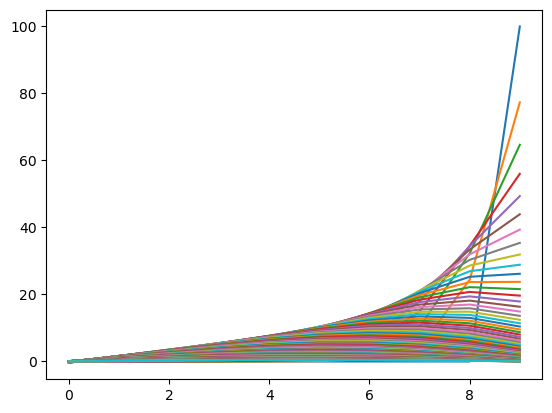

In [85]:
for i in range(nt):
    plt.plot(T[i])

plt.show()


### Test #1: Constant on X axis

In [27]:
# Dirichlet boundary conditions
#-------------------------------------------------- 
b[0] = 0
b[-1] = 100

In [28]:
T = Ainv@b

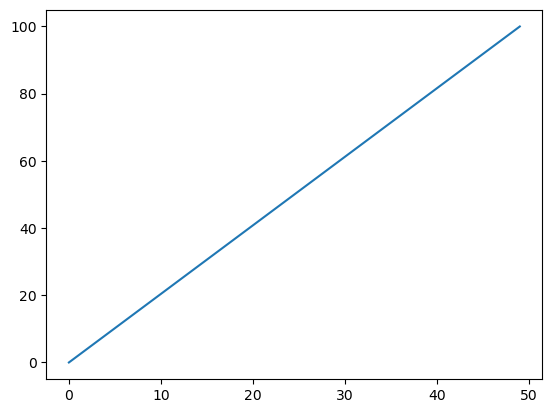

In [32]:
plt.plot(T)
plt.show()

In [30]:
referenceFunction = lambda x : 100*x/Lx

In [31]:
MSQError = np.sqrt(sum((referenceFunction(X) - T)**2)/T.shape[0])

print('Mean squared error:  {:.2e}'.format(MSQError))

Mean squared error:  1.91e-13


### Test #2: Manufactured solution

The manufactured solution will be following the equation: 

$$ T(x) = x^3 -20 x^2 + 20 x$$

In [52]:
referenceFunction = lambda x: 100*(x**3 - 20*x**2 + 20*X)
referenceDeriv = lambda x: 100*(6*x - 40)

Q = -referenceDeriv(X)*rho*cv
qvec = Q/(rho*cv)

b = M@qvec

In [53]:
# Dirichlet boundary conditions
#-------------------------------------------------- 
b[0] = 0
b[-1] = 100

In [54]:
T = Ainv@b

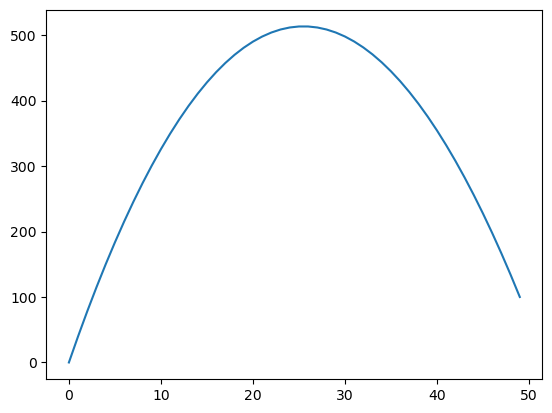

In [55]:
plt.plot(T)
plt.show()

In [56]:
MSQError = np.sqrt(sum((referenceFunction(X) - T)**2)/T.shape[0])

print('Mean squared error:  {:.2e}'.format(MSQError))

Mean squared error:  4.08e-12
